In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('E_C_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [4]:
import jellyfish
#Jaro Distance    
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Jaro'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Jaro_best = 0
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Jd = jellyfish.jaro_distance(s1 , s2)
                print("Jaro Distance :" , Jd)
                if Jd >= Jaro_best:
                    Jaro_best = Jd
                    best_match = s2
                df[col+'_Jaro'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Jaro_best: " , Jaro_best)        
            print("*******")       

0.1_TypoC
row:  0
s1:  Janruary
s2:  January
Jaro Distance : 0.8869047619047619


s1:  Janruary
s2:  April
Jaro Distance : 0.44166666666666665


s1:  Janruary
s2:  June
Jaro Distance : 0.5972222222222222


s1:  Janruary
s2:  August
Jaro Distance : 0.4305555555555555


s1:  Janruary
s2:  September
Jaro Distance : 0.41203703703703703


s1:  Janruary
s2:  November
Jaro Distance : 0.4166666666666667


Best Match:  January
Jaro_best:  0.8869047619047619
*******
row:  1
s1:  tAugust
s2:  January
Jaro Distance : 0.42857142857142855


s1:  tAugust
s2:  April
Jaro Distance : 0.44761904761904764


s1:  tAugust
s2:  June
Jaro Distance : 0.46428571428571425


s1:  tAugust
s2:  August
Jaro Distance : 0.9523809523809524


s1:  tAugust
s2:  September
Jaro Distance : 0.41798941798941797


s1:  tAugust
s2:  November
Jaro Distance : 0


Best Match:  August
Jaro_best:  0.9523809523809524
*******
row:  2
s1:  JanJuary
s2:  January
Jaro Distance : 0.9583333333333334


s1:  JanJuary
s2:  April
Jaro Distance

In [5]:
#Jaro Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
JaroAccuracy = []
for x in NameOfColumns:
    if "Jaro" in x:
        print("Jaro Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        JaroAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(JaroAccuracy)

Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  0.95
Jaro Accuracy :  0.883333333333
Jaro Accuracy :  0.8
Jaro Accuracy :  0.725
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.94999999999999996, 0.8833333333333333, 0.80000000000000004, 0.72499999999999998]


In [6]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoC_Jaro'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoC_Jaro'].iat[x]
diff     

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7,Transformation_0.8,Transformation_0.9,Transformation_1
0,January,,,,,,,,,,June
1,August,,,,,,,,January,,
2,January,,,,,,,,,,
3,November,,,,,,,,,September,
4,April,,,,,,,,,,
5,April,,,,,,,,,,November
6,June,,,,,,,,,,August
7,November,,,,,,,,,September,
8,January,,,,,,,,,,November
9,August,,,,,,,,,,


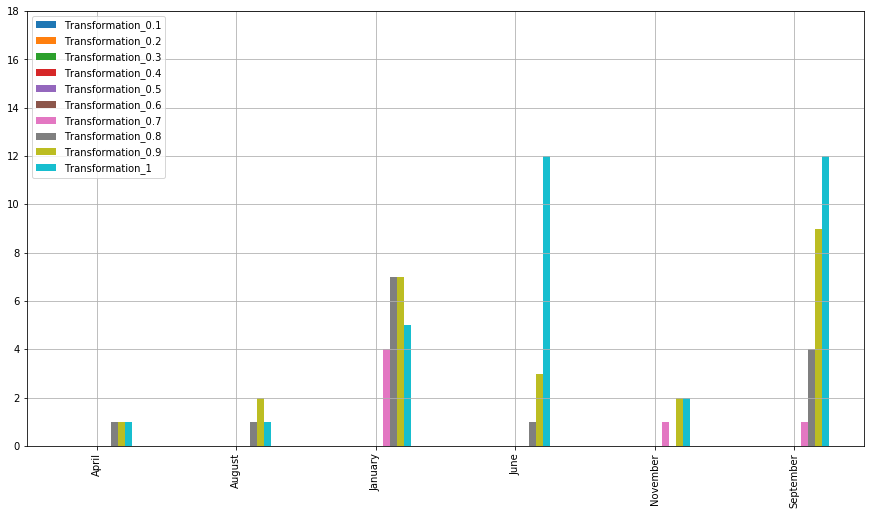

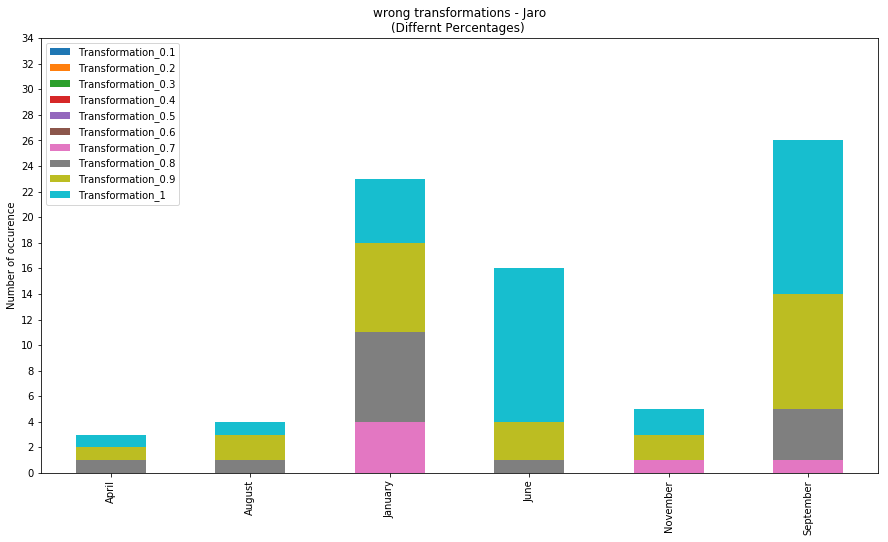

In [9]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 20 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 36 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Differnt Percentages) ')
plt.show()

In [11]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
per = [10 , 20 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoC_Jaro'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoC')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoC'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.7_TypoC
April To November
Noisy form: XMAmKpril


June To January
Noisy form: BJuuyne


June To January
Noisy form: JrkHune


June To January
Noisy form: pJTCune


April To September
Noisy form: DHdAqpril


June To January
Noisy form: EJnJune


********
0.8_TypoC
August To January
Noisy form: gAqAjuagust


June To September
Noisy form: pMyJune


June To January
Noisy form: kJnunUe


June To January
Noisy form: KJwQune


June To August
Noisy form: yJAutne


January To June
Noisy form: NJgSnaJnunary


April To September
Noisy form: cAGqKpril


June To January
Noisy form: sJpxune


June To September
Noisy form: tRlJune


June To January
Noisy form: iJxoune


June To January
Noisy form: xJrJune


August To April
Noisy form: AbuIwibgust


June To January
Noisy form: DJLJune


April To September
Noisy form: AApeebril


********
0.9_TypoC
November To September
Noisy form: SNNIoeYrvezmber


November To September
Noisy form: MNsoeZsPvemXber


June To August
Noisy form: uYJyuKne


June To Janu

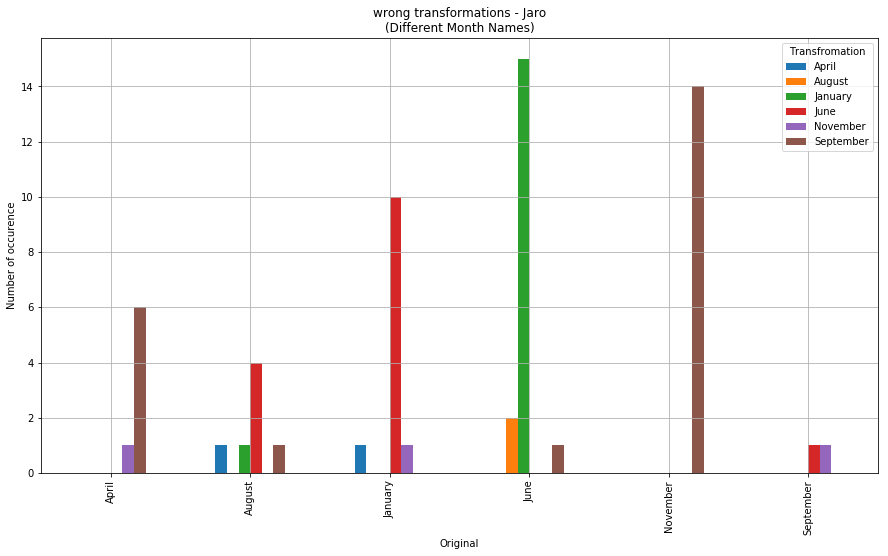

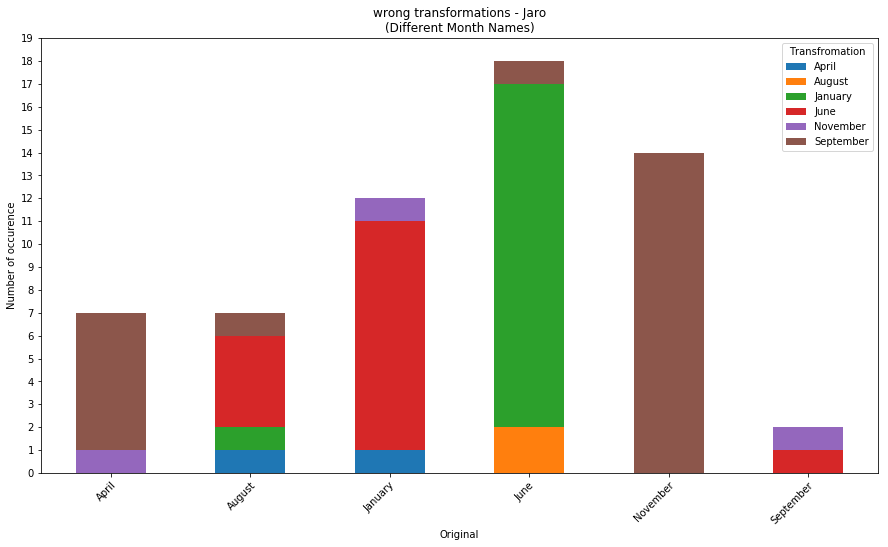

In [12]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.show()

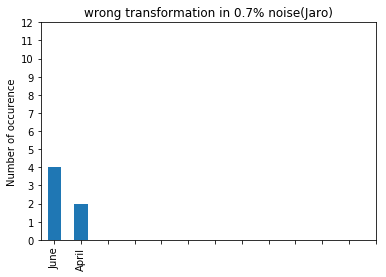

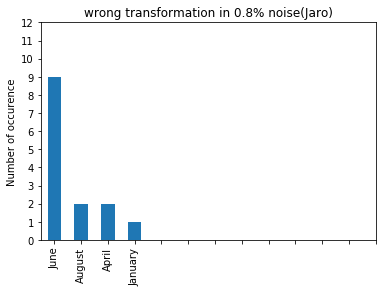

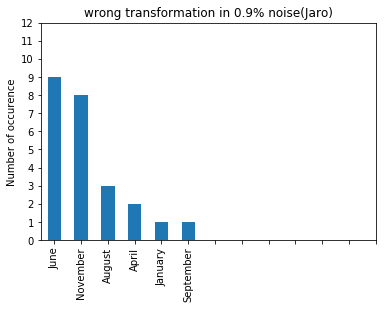

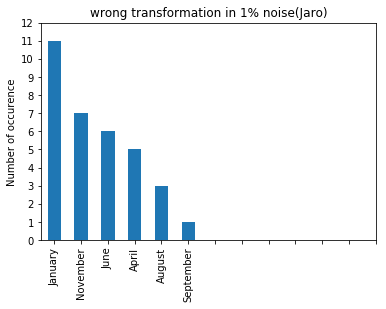

In [13]:
import numpy as np

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoC_Jaro'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoC'] = ''
    
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoC'].iat[x] = df[str(p) + '_TypoC'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoC_Jaro'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise(Jaro)'.format(p))
        plt.xticks(range(0,13))
        plt.show() 